## Problem Definition

## Data Collection and Preprocessing

In [1]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
import IPython
import os

In [10]:
exposures_data = pd.read_csv('Exposures.csv')
hurricane_data = pd.read_csv('Hurricanes.csv')

### Huricanes

| Variable Name         | Units      | Description |
|-----------------------|------------|-------------|
| Serial_Num            |            | Storm Identifier. YYYYJJJHTTNNN where: <br> - YYYY is the year of the first recorded observation of the storm <br> - JJJ is the day of year of the first recorded observation <br> - H is the hemisphere (N=Northern, S=Southern) <br> - TT is the absolute value of the rounded latitude <br> - NNN is the rounded longitude |
| Season                | year       |             |
| Num                   |            | The cardinal number of the system for that season. Includes all basins. |
| Basin                 |            | Basins include: NA, EP, WP, NI, SI, SP, SA, MM |
| Sub_basin             |            | Subbasins include: MM, CS, GM, CP, BB, AS, WA, EA |
| Name                  |            | Name provided by the agency. Excludes names with digits or abbreviations. |
| ISO_time              | UTC        | ISO Time in UTC. Format is YYYY-MM-DD HH:mm:ss. |
| Nature                |            | Combined storm type. Includes: DS, TS, ET, SS, NR, MX |
| Latitude              | deg_north  |             |
| Longitude             | deg_east   |             |
| Wind(WMO)             | knots      | Maximum sustained wind speed from the WMO agency for the current location. |
| Pres(WMO)             | mb         | Wind pressure |
| Center                |            |             |
| Wind(WMO) Percentile  | %          |             |
| Pres(WMO) Percentile  | %          |             |
| Track_type            |            | Track type identifying interaction, including: PROVISIONAL, PROVISIONAL_spur, MAIN, spur |


In [11]:
hurricane_data.head(5)

,Serial_Num (N/A),Season (Year),Num (#),Basin (BB),Sub_basin (BB),Name (N/A),ISO_time (YYYY-MM-DD HH:MM:SS),Nature (N/A),Latitude (deg_north),Longitude (deg_east),Wind(WMO) (kt),Pres(WMO) (mb),Center (N/A),Wind(WMO) Percentile (%),Pres(WMO) Percentile (%),Track_type (N/A)
0,1980199N31284,1980,1,NA,MM,UNNAMED,7/17/1980 0:00,TS,30.5,-76.5,20,0,atcf,0.857,-100.0,main
1,1980199N31284,1980,1,NA,MM,UNNAMED,7/17/1980 6:00,TS,30.2,-77.2,25,0,atcf,4.702,-100.0,main
2,1980199N31284,1980,1,NA,MM,UNNAMED,7/17/1980 12:00,TS,30.0,-78.0,25,0,atcf,4.702,-100.0,main
3,1980199N31284,1980,1,NA,MM,UNNAMED,7/17/1980 18:00,TS,29.9,-79.3,25,0,atcf,4.702,-100.0,main
4,1980199N31284,1980,1,NA,MM,UNNAMED,7/18/1980 0:00,TS,29.8,-80.2,25,0,atcf,4.702,-100.0,main


In [6]:
hurricane_data.shape

(13665, 16)

In [7]:
#Check any NA value in the dataset
na_count_hurricane = hurricane_data.isna().sum()
na_count_hurricane

Serial_Num (N/A)                  0
Season (Year)                     0
Num (#)                           0
Basin (BB)                        0
Sub_basin (BB)                    0
Name (N/A)                        0
ISO_time (YYYY-MM-DD HH:MM:SS)    0
Nature (N/A)                      0
Latitude (deg_north)              0
Longitude (deg_east)              0
Wind(WMO) (kt)                    0
Pres(WMO) (mb)                    0
Center (N/A)                      0
Wind(WMO) Percentile (%)          0
Pres(WMO) Percentile (%)          0
Track_type (N/A)                  0
dtype: int64

In [8]:
hurricane_data['ISO_time (YYYY-MM-DD HH:MM:SS)']= pd.to_datetime(hurricane_data['ISO_time (YYYY-MM-DD HH:MM:SS)'])

In [9]:
hurricane_data['day'] = hurricane_data['ISO_time (YYYY-MM-DD HH:MM:SS)'].dt.day
hurricane_data['month'] = hurricane_data['ISO_time (YYYY-MM-DD HH:MM:SS)'].dt.month
hurricane_data['hour'] = hurricane_data['ISO_time (YYYY-MM-DD HH:MM:SS)'].dt.hour


In [10]:
#Drop the ISO time
new_columns = [
    'Serial_Num (N/A)', 'Season (Year)', 'Num (#)', 'Basin (BB)',
    'Sub_basin (BB)', 'Name (N/A)', 'day', 'month', 'hour', 
    'Nature (N/A)', 'Latitude (deg_north)', 'Longitude (deg_east)',
    'Wind(WMO) (kt)', 'Pres(WMO) (mb)', 'Center (N/A)',
    'Wind(WMO) Percentile (%)', 'Pres(WMO) Percentile (%)',
    'Track_type (N/A)'
]
hurricane_data = hurricane_data[new_columns]

In [11]:
hurricane_data.head(10)

,Serial_Num (N/A),Season (Year),Num (#),Basin (BB),Sub_basin (BB),Name (N/A),day,month,hour,Nature (N/A),Latitude (deg_north),Longitude (deg_east),Wind(WMO) (kt),Pres(WMO) (mb),Center (N/A),Wind(WMO) Percentile (%),Pres(WMO) Percentile (%),Track_type (N/A)
0,1980199N31284,1980,1,NA,MM,UNNAMED,17,7,0,TS,30.5,-76.5,20,0,atcf,0.857,-100.0,main
1,1980199N31284,1980,1,NA,MM,UNNAMED,17,7,6,TS,30.2,-77.2,25,0,atcf,4.702,-100.0,main
2,1980199N31284,1980,1,NA,MM,UNNAMED,17,7,12,TS,30.0,-78.0,25,0,atcf,4.702,-100.0,main
3,1980199N31284,1980,1,NA,MM,UNNAMED,17,7,18,TS,29.9,-79.3,25,0,atcf,4.702,-100.0,main
4,1980199N31284,1980,1,NA,MM,UNNAMED,18,7,0,TS,29.8,-80.2,25,0,atcf,4.702,-100.0,main
5,1980199N31284,1980,1,NA,MM,UNNAMED,18,7,6,TS,29.5,-81.1,25,0,atcf,4.702,-100.0,main
6,1980199N31284,1980,1,NA,MM,UNNAMED,18,7,12,TS,29.5,-82.0,20,0,atcf,0.857,-100.0,main
7,1980199N31284,1980,1,NA,MM,UNNAMED,18,7,18,TS,29.4,-83.0,20,0,atcf,0.857,-100.0,main
8,1980199N31284,1980,1,NA,MM,UNNAMED,19,7,0,TS,29.4,-84.0,20,0,atcf,0.857,-100.0,main
9,1980199N31284,1980,1,NA,MM,UNNAMED,19,7,6,TS,29.5,-84.7,20,0,atcf,0.857,-100.0,main


In [12]:
hurricane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13665 entries, 0 to 13664
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Serial_Num (N/A)          13665 non-null  object 
 1   Season (Year)             13665 non-null  int64  
 2   Num (#)                   13665 non-null  int64  
 3   Basin (BB)                13665 non-null  object 
 4   Sub_basin (BB)            13665 non-null  object 
 5   Name (N/A)                13665 non-null  object 
 6   day                       13665 non-null  int32  
 7   month                     13665 non-null  int32  
 8   hour                      13665 non-null  int32  
 9   Nature (N/A)              13665 non-null  object 
 10  Latitude (deg_north)      13665 non-null  float64
 11  Longitude (deg_east)      13665 non-null  float64
 12  Wind(WMO) (kt)            13665 non-null  int64  
 13  Pres(WMO) (mb)            13665 non-null  int64  
 14  Center

In [13]:
hurricane_data.describe()

,Season (Year),Num (#),day,month,hour,Latitude (deg_north),Longitude (deg_east),Wind(WMO) (kt),Pres(WMO) (mb),Wind(WMO) Percentile (%),Pres(WMO) Percentile (%)
count,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000,13665.000000
mean,1997.144018,9.364654,15.844566,8.738236,9.082473,26.588408,-62.120095,48.810245,921.161873,44.547622,39.462629
std,9.126448,5.676807,8.928146,1.337584,6.723069,10.460518,21.010552,25.495429,258.229814,30.555272,48.380011
min,1980.000000,1.000000,1.000000,1.000000,0.000000,7.200000,-118.300000,0.000000,0.000000,-100.000000,-100.000000
25%,1989.000000,5.000000,8.000000,8.000000,6.000000,17.900000,-79.000000,30.000000,980.000000,17.062000,16.249000
50%,1998.000000,9.000000,16.000000,9.000000,12.000000,25.900000,-62.600000,40.000000,998.000000,42.219000,47.972000
75%,2005.000000,13.000000,24.000000,9.000000,18.000000,33.200000,-46.800000,60.000000,1006.000000,68.918000,74.198000
max,2011.000000,31.000000,31.000000,12.000000,23.000000,70.700000,13.500000,165.000000,1024.000000,99.997000,99.996000


#### Visualization

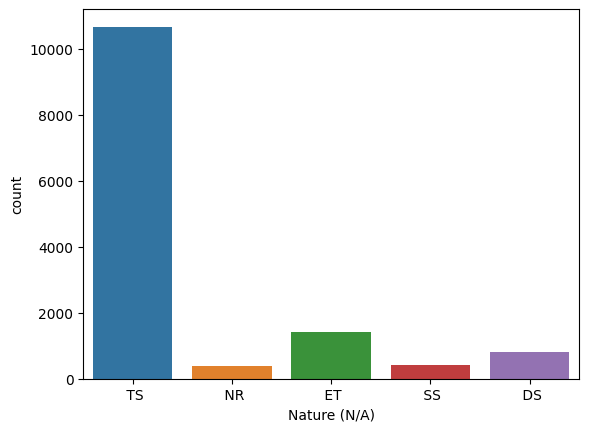

In [14]:
sns.countplot(x='Nature (N/A)', data=hurricane_data)
plt.show()

In [15]:
df = hurricane_data[hurricane_data['Name (N/A)']=='JOSEPHINE'][hurricane_data['Season (Year)']==1996].reset_index(drop=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11460\2282705627.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = hurricane_data[hurricane_data['Name (N/A)']=='JOSEPHINE'][hurricane_data['Season (Year)']==1996].reset_index(drop=True)


In [36]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=df.index,y=df['Wind(WMO) (kt)'],name='wind'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df.index,y=df['Pres(WMO) (mb)'],name='pressure'),secondary_y=True,)
fig.update_layout(autosize=False,width=700,height=500,title_text="Wind and Pressure")
fig.update_xaxes(title_text='index of 6hr interval')
fig.update_yaxes(title_text="Wind",secondary_y=False)
fig.update_yaxes(title_text="Pressure",secondary_y=True)
fig.show()

### Exposures

| Variable Name           | Units       | Description |
|-------------------------|-------------|-------------|
| **Location**            |             | Unique identifier for the location of the exposure. |
| **Latitude**            | degrees     | Latitude coordinate of the exposure location. |
| **Longitude**           | degrees     | Longitude coordinate of the exposure location. |
| **Multi-Story?**        |             | Indicates whether the exposure is a multi-story building (Yes/No). |
| **Total Insured Value** | currency    | The total value insured for the exposure. |
| **Premium**             | currency    | The amount paid for the insurance policy. |
| **Losses - Non Catastrophe** | currency | Financial losses not related to catastrophes. |
| **PolicyYear**          | year        | The year the insurance policy was issued or is in effect. |
| **PolicyResultLookup**  |             | Lookup value related to the result of the policy |
| **LocationLookup**      |             | Lookup value related to the location |


In [17]:
exposures_data.head(10)


,Location,Latitude,Longitude,Multi-Story?,Total Insured Value,Premium,Losses - Non Catastrophe,PolicyYear,PolicyResultLookup,LocationLookup
0,1,19.0,-100.1,No,"290,874","2,644","68,987",1980,1980 - 1,19-100.1
1,1,19.0,-100.1,No,"296,488","2,697",0,1981,1981 - 1,19-100.1
2,1,19.0,-100.1,No,"301,944","2,751",0,1982,1982 - 1,19-100.1
3,1,19.0,-100.1,No,"308,254","2,806",0,1983,1983 - 1,19-100.1
4,1,19.0,-100.1,No,"313,433","2,862",0,1984,1984 - 1,19-100.1
5,1,19.0,-100.1,No,"318,636","2,919",0,1985,1985 - 1,19-100.1
6,1,19.0,-100.1,No,"326,315","2,977",0,1986,1986 - 1,19-100.1
7,1,19.0,-100.1,No,"331,242","3,037",0,1987,1987 - 1,19-100.1
8,1,19.0,-100.1,No,"336,443","3,098",0,1988,1988 - 1,19-100.1
9,1,19.0,-100.1,No,"344,686","3,159",0,1989,1989 - 1,19-100.1


In [18]:
exposures_data.shape

(1257, 10)

In [19]:
exposures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  1257 non-null   int64  
 1   Latitude                  1257 non-null   float64
 2   Longitude                 1257 non-null   float64
 3   Multi-Story?              1257 non-null   object 
 4   Total Insured Value       1257 non-null   object 
 5   Premium                   1257 non-null   object 
 6   Losses - Non Catastrophe  1257 non-null   object 
 7   PolicyYear                1257 non-null   object 
 8   PolicyResultLookup        1257 non-null   object 
 9   LocationLookup            1257 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 98.3+ KB


In [21]:
#Check any NA value in the dataset
exposures_data.isnull().sum()

Location                    0
Latitude                    0
Longitude                   0
Multi-Story?                0
Total Insured Value         0
Premium                     0
Losses - Non Catastrophe    0
PolicyYear                  0
PolicyResultLookup          0
LocationLookup              0
dtype: int64

In [22]:
# Correct Data Format
adjusted_cols = ["Total Insured Value", "Premium","Losses - Non Catastrophe","PolicyYear"]
for col in adjusted_cols:
    exposures_data[col] = exposures_data[col].str.replace(',', '').astype(int)

In [20]:
exposures_data.describe()

,Location,Latitude,Longitude
count,1257.000000,1257.000000,1257.000000
mean,45.622116,24.448528,-62.049324
std,29.609286,9.539034,20.172962
min,1.000000,7.200000,-100.100000
25%,19.000000,15.900000,-78.900000
50%,40.000000,26.300000,-63.400000
75%,72.000000,31.400000,-45.200000
max,100.000000,46.200000,-27.400000


We want to check if location wass at risk by checking if location coordinate was inside hurricane coordinates
The area of location we assume is within 1 radius from latitude and longitude

In [23]:
def check_at_risk(row):
    lat_min = row['Latitude'] - 1
    lat_max = row['Latitude'] + 1
    long_min = row['Longitude'] - 1
    long_max = row['Longitude'] + 1
    count = len(hurricane_data[(hurricane_data['Latitude (deg_north)'] < lat_max) &
                               (hurricane_data['Latitude (deg_north)'] > lat_min) &
                               (hurricane_data['Longitude (deg_east)'] < long_max) &
                               (hurricane_data['Longitude (deg_east)'] > long_min)])
    return "At Risk" if count > 0 else "Not At Risk"

exposures_data['At Risk?'] = exposures_data.apply(check_at_risk, axis=1)

Now we create a new variable for location region.

In [24]:
region_mapping = pd.read_csv('Region mapping.csv')

# Define a function to determine the region
def get_region(row):
    if row['Longitude'] < region_mapping.loc[3, 'Longitude Boundary Eastern End']:
        return 'West'
    elif row['Latitude'] < region_mapping.loc[0, 'Latitude Boundary Northern End']:
        return 'South'
    elif row['Longitude'] < region_mapping.loc[2, 'Longitude Boundary Eastern End']:
        return 'Midwest'
    else:
        return 'Northeast'

In [25]:
exposures_data['Region'] = exposures_data.apply(get_region, axis=1
)

In [26]:
exposures_data.head(5)

,Location,Latitude,Longitude,Multi-Story?,Total Insured Value,Premium,Losses - Non Catastrophe,PolicyYear,PolicyResultLookup,LocationLookup,At Risk?,Region
0,1,19.0,-100.1,No,290874,2644,68987,1980,1980 - 1,19-100.1,At Risk,South
1,1,19.0,-100.1,No,296488,2697,0,1981,1981 - 1,19-100.1,At Risk,South
2,1,19.0,-100.1,No,301944,2751,0,1982,1982 - 1,19-100.1,At Risk,South
3,1,19.0,-100.1,No,308254,2806,0,1983,1983 - 1,19-100.1,At Risk,South
4,1,19.0,-100.1,No,313433,2862,0,1984,1984 - 1,19-100.1,At Risk,South


In [27]:
exposures_data.describe()

,Location,Latitude,Longitude,Total Insured Value,Premium,Losses - Non Catastrophe,PolicyYear
count,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000
mean,45.622116,24.448528,-62.049324,1.045998e+06,6388.624503,4486.643596,1997.929196
std,29.609286,9.539034,20.172962,8.672599e+05,5774.709114,18392.594712,10.731030
min,1.000000,7.200000,-100.100000,1.199450e+05,502.000000,0.000000,1980.000000
25%,19.000000,15.900000,-78.900000,3.815710e+05,2450.000000,0.000000,1989.000000
50%,40.000000,26.300000,-63.400000,7.633480e+05,4081.000000,0.000000,1998.000000
75%,72.000000,31.400000,-45.200000,1.489011e+06,9088.000000,0.000000,2007.000000
max,100.000000,46.200000,-27.400000,4.990936e+06,36301.000000,192924.000000,2016.000000


In [28]:
selected_cols =['Total Insured Value','Premium','Losses - Non Catastrophe']
exposures_data[selected_cols].corr()

,Total Insured Value,Premium,Losses - Non Catastrophe
Total Insured Value,1.000000,0.819942,0.142393
Premium,0.819942,1.000000,0.167160
Losses - Non Catastrophe,0.142393,0.167160,1.000000


In [29]:
exposures_data[exposures_data['Losses - Non Catastrophe'] != 0]

,Location,Latitude,Longitude,Multi-Story?,Total Insured Value,Premium,Losses - Non Catastrophe,PolicyYear,PolicyResultLookup,LocationLookup,At Risk?,Region
0,1,19.0,-100.1,No,290874,2644,68987,1980,1980 - 1,19-100.1,At Risk,South
47,3,22.9,-74.5,Yes,1854070,4147,37570,2006,2006 - 3,22.9-74.5,At Risk,South
56,3,22.9,-74.5,Yes,2245665,4956,36871,2015,2015 - 3,22.9-74.5,At Risk,South
68,4,15.4,-28.8,Yes,388656,2268,12112,1990,1990 - 4,15.4-28.8,At Risk,South
76,4,15.4,-28.8,Yes,463052,2658,18869,1998,1998 - 4,15.4-28.8,At Risk,South
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,93,18.4,-75.6,Yes,317877,1124,10019,1992,1992 - 93,18.4-75.6,At Risk,South
1209,94,24.4,-42.9,Yes,660931,3058,22687,1998,1998 - 94,24.4-42.9,At Risk,South
1215,94,24.4,-42.9,Yes,738201,3443,73029,2004,2004 - 94,24.4-42.9,At Risk,South
1216,95,24.4,-42.9,Yes,749496,3512,31469,2005,2005 - 95,24.4-42.9,At Risk,South


### Visualization

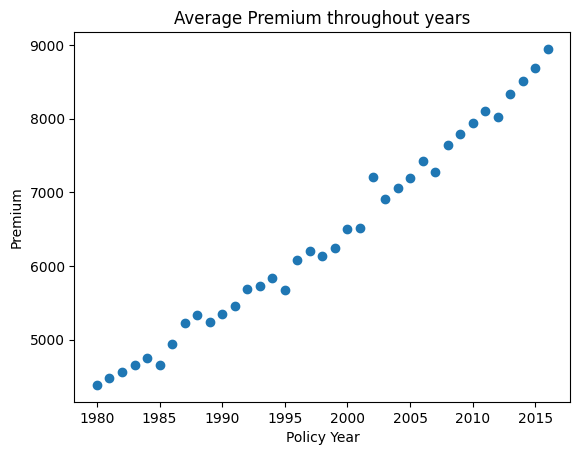

In [30]:
avg_premium = exposures_data.groupby('PolicyYear')['Premium'].mean()
unique_years = exposures_data['PolicyYear'].unique().tolist()
plt.scatter(unique_years, avg_premium)
plt.xlabel('Policy Year')
plt.ylabel('Premium')
plt.title('Average Premium throughout years')
plt.show()

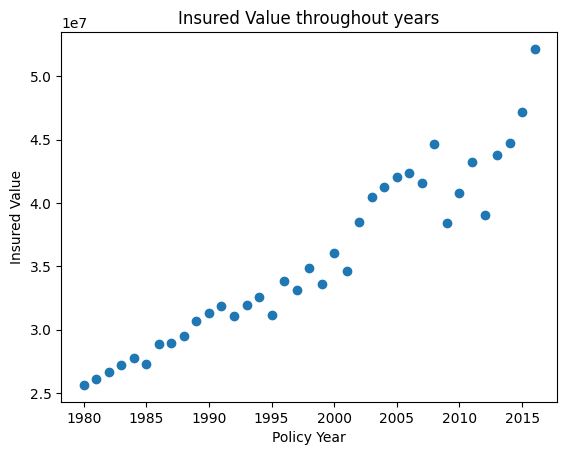

In [31]:
total_insured = exposures_data.groupby('PolicyYear')['Total Insured Value'].sum()
plt.scatter(unique_years, total_insured)
plt.xlabel('Policy Year')
plt.ylabel('Insured Value')
plt.title('Insured Value throughout years')
plt.show()

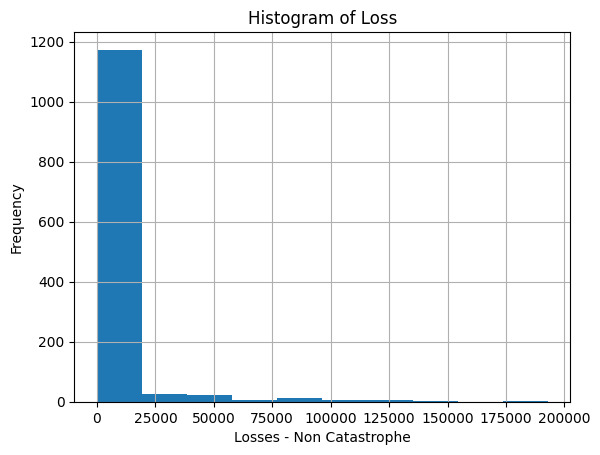

In [32]:
exposures_data['Losses - Non Catastrophe'].hist()
plt.xlabel('Losses - Non Catastrophe')
plt.ylabel('Frequency')
plt.title('Histogram of Loss')
plt.show()

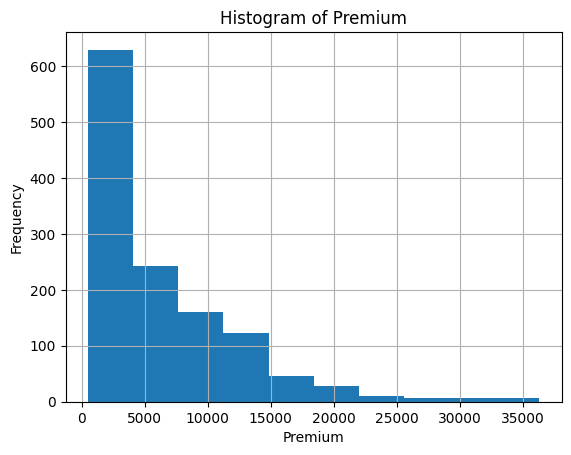

In [33]:
exposures_data['Premium'].hist()
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.title('Histogram of Premium')
plt.show()

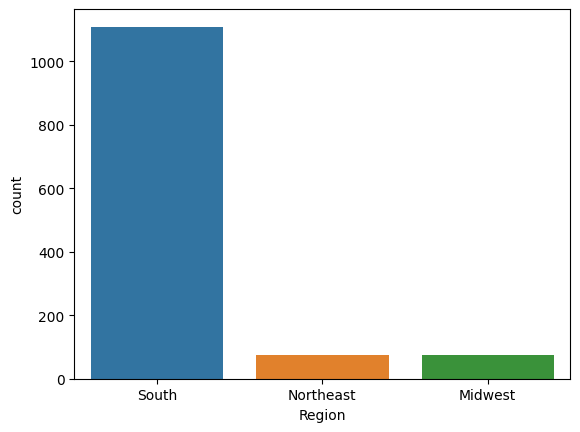

In [34]:
sns.countplot(data=exposures_data, x='Region')
plt.show()

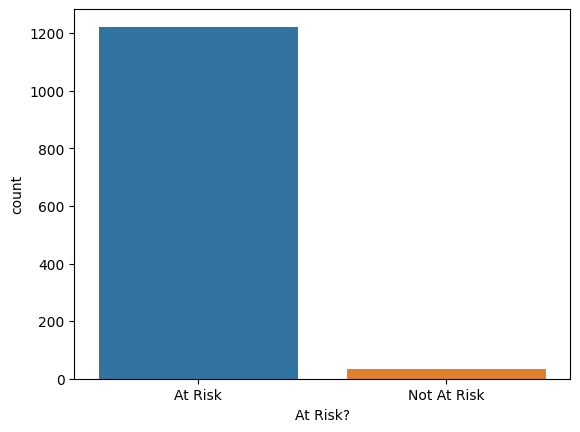

In [35]:
sns.countplot(data=exposures_data, x='At Risk?')
plt.show()

## Modeling

In [ ]:
import plotly.express as px